# 🔍 EDA - Análisis Exploratorio de Datos para Detección de Anomalías
## Objetivo
Realizar un análisis exploratorio completo del dataset de detección de anomalías y threat intelligence para entender la naturaleza de los datos antes de implementar el pipeline de ML.

## Dataset
- **Fuente**: [Anomaly Detection and Threat Intelligence Dataset](https://www.kaggle.com/datasets/ziya07/anomaly-detection-and-threat-intelligence-dataset)
- **Propósito**: Detección de anomalías en logs de seguridad
- **Enfoque**: 80% sin etiquetar (no supervisado) + 20% con etiquetas (semi-supervisado)

## Estrategia de Análisis
1. **Carga y Exploración Inicial** - Entender la estructura de los datos
2. **Análisis de la Estructura de Datos** - Tipos de datos, valores faltantes, etc.
3. **Distribución de Clases** - Ver el balance entre normal y anómalo
4. **Análisis de Features** - Explorar cada variable individualmente
5. **Visualizaciones Clave** - Gráficos para entender patrones
6. **Preparación para ML** - Split 80/20 y preparación de features
7. **Conclusiones del EDA** - Insights clave para el modelo

## 📚 Importaciones y Configuración

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 📁 Configuración de Rutas y Descarga de Datos

In [68]:
# Configuración de rutas
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data"
RAW_DIR = DATA_DIR / "raw"

print(f"📁 Directorio del proyecto: {PROJECT_ROOT}")
print(f"📁 Directorio de datos: {DATA_DIR}")
print(f"📁 Datos raw: {RAW_DIR}")

# Crear directorios si no existen
print("\n�� Creando estructura de directorios:")
for path in [DATA_DIR, RAW_DIR]:
    if not path.exists():
        path.mkdir(parents=True, exist_ok=True)
        print(f"  ✅ Creado: {path}")
    else:
        print(f"  ✅ Ya existe: {path}")

# Verificar estructura final
print("\n📋 Estructura de directorios final:")
for path in [PROJECT_ROOT, DATA_DIR, RAW_DIR]:
    if path.exists():
        print(f"  ✅ {path.name}: {path}")
    else:
        print(f"  ❌ {path.name}: {path} (no existe)")

📁 Directorio del proyecto: c:\Users\Esteban\Desktop\MELIChallenge
📁 Directorio de datos: c:\Users\Esteban\Desktop\MELIChallenge\data
📁 Datos raw: c:\Users\Esteban\Desktop\MELIChallenge\data\raw

�� Creando estructura de directorios:
  ✅ Ya existe: c:\Users\Esteban\Desktop\MELIChallenge\data
  ✅ Ya existe: c:\Users\Esteban\Desktop\MELIChallenge\data\raw

📋 Estructura de directorios final:
  ✅ MELIChallenge: c:\Users\Esteban\Desktop\MELIChallenge
  ✅ data: c:\Users\Esteban\Desktop\MELIChallenge\data
  ✅ raw: c:\Users\Esteban\Desktop\MELIChallenge\data\raw


## 🚀 Descarga del Dataset desde Kaggle

In [69]:
from pathlib import Path
import kagglehub
import shutil

# Dataset a descargar
dataset_name = "ziya07/anomaly-detection-and-threat-intelligence-dataset"
print(f"📥 Descargando dataset: {dataset_name}")

try:
    # Descargar con kagglehub (usa cache interno)
    dataset_path = kagglehub.dataset_download(dataset_name)
    src = Path(dataset_path)

    if not src.exists():
        raise FileNotFoundError(f"❌ Dataset no encontrado en {src}")

    # Copiar a carpeta RAW_DIR para tenerlo local en el proyecto
    target = RAW_DIR / src.name
    if target.exists():
        shutil.copytree(src, target, dirs_exist_ok=True)
    else:
        shutil.copytree(src, target)

    RAW_DIR = target
    print(f"✅ Dataset descargado y guardado en: {RAW_DIR}")

except Exception as e:
    print(f"❌ Error al descargar: {e}")
    print("💡 Alternativa: Descarga manual desde Kaggle y coloca los archivos en data/raw/")


📥 Descargando dataset: ziya07/anomaly-detection-and-threat-intelligence-dataset
✅ Dataset descargado y guardado en: c:\Users\Esteban\Desktop\MELIChallenge\data\raw\1


## 📊 Carga y Exploración Inicial de Datos

In [70]:
# Cargar el dataset principal
# Buscar archivos CSV en el dataset descargado
csv_files = list(RAW_DIR.rglob("*.csv"))

if csv_files:
    # Tomar el primer archivo CSV encontrado
    data_file = csv_files[0]
    print(f"📊 Cargando archivo: {data_file.name}")
    print(f"📁 Ruta completa: {data_file}")
    
    # Cargar datos
    df = pd.read_csv(data_file)
    
    print(f"✅ Dataset cargado exitosamente")
    print(f"📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
else:
    print("❌ No se encontraron archivos CSV en el dataset")
    print("💡 Verifica que el dataset se haya descargado correctamente")
    print(f"�� Directorio actual: {RAW_DIR}")
    
    # Intentar buscar en subdirectorios
    print("\n🔍 Buscando en subdirectorios...")
    all_files = list(RAW_DIR.rglob("*"))
    csv_files = [f for f in all_files if f.suffix.lower() == '.csv']
    
    if csv_files:
        print(f"✅ Encontrados {len(csv_files)} archivos CSV:")
        for csv_file in csv_files:
            print(f"   📄 {csv_file}")
        
        # Cargar el primero
        data_file = csv_files[0]
        print(f"\n📊 Cargando archivo: {data_file.name}")
        df = pd.read_csv(data_file)
        print(f"✅ Dataset cargado exitosamente")
        print(f"📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    else:
        print("❌ No se encontraron archivos CSV en ningún subdirectorio")

📊 Cargando archivo: smart_system_anomaly_dataset.csv
📁 Ruta completa: c:\Users\Esteban\Desktop\MELIChallenge\data\raw\1\smart_system_anomaly_dataset.csv
✅ Dataset cargado exitosamente
📊 Dimensiones: 10000 filas × 14 columnas


## 🔍 Exploración Inicial de la Estructura de Datos

In [71]:
# Información básica del dataset
print("�� INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 50)
print(f"📊 Forma: {df.shape}")
print(f"�� Columnas: {list(df.columns)}")
print(f"�� Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 TIPOS DE DATOS")
print("=" * 50)
print(df.dtypes)

print("\n📋 PRIMERAS FILAS")
print("=" * 50)
print(df.head())

print("\n📋 ÚLTIMAS FILAS")
print("=" * 50)
print(df.tail())

�� INFORMACIÓN BÁSICA DEL DATASET
📊 Forma: (10000, 14)
�� Columnas: ['timestamp', 'device_id', 'device_type', 'cpu_usage', 'memory_usage', 'network_in_kb', 'network_out_kb', 'packet_rate', 'avg_response_time_ms', 'service_access_count', 'failed_auth_attempts', 'is_encrypted', 'geo_location_variation', 'label']
�� Memoria utilizada: 3.43 MB

📋 TIPOS DE DATOS
timestamp                  object
device_id                  object
device_type                object
cpu_usage                 float64
memory_usage              float64
network_in_kb               int64
network_out_kb              int64
packet_rate                 int64
avg_response_time_ms      float64
service_access_count        int64
failed_auth_attempts        int64
is_encrypted                int64
geo_location_variation    float64
label                      object
dtype: object

📋 PRIMERAS FILAS
                    timestamp       device_id device_type  cpu_usage  memory_usage  network_in_kb  network_out_kb  packet_rate  avg_

## 🎯 Análisis de la Variable Objetivo (Target)

In [72]:
# Identificar la columna objetivo (target)
# En datasets de seguridad, suele llamarse 'label', 'class', 'anomaly', etc.
target_columns = [col for col in df.columns if any(keyword in col.lower() 
                   for keyword in ['label', 'class', 'anomaly', 'attack', 'malicious'])]

print("🎯 COLUMNAS OBJETIVO ENCONTRADAS:")
print("=" * 50)
if target_columns:
    for col in target_columns:
        print(f"📌 {col}")
        print(f"   Valores únicos: {df[col].unique()}")
        print(f"   Distribución:\n{df[col].value_counts()}")
        print(f"   Porcentajes (%):\n{(df[col].value_counts(normalize=True) * 100).round(2)}")
        print("-" * 30)


🎯 COLUMNAS OBJETIVO ENCONTRADAS:
📌 label
   Valores únicos: ['Normal' 'Anomaly_DoS' 'Anomaly_Injection' 'Anomaly_Spoofing']
   Distribución:
label
Normal               7948
Anomaly_DoS           997
Anomaly_Injection     563
Anomaly_Spoofing      492
Name: count, dtype: int64
   Porcentajes (%):
label
Normal               79.48
Anomaly_DoS           9.97
Anomaly_Injection     5.63
Anomaly_Spoofing      4.92
Name: proportion, dtype: float64
------------------------------


## 📊 Análisis de Valores Faltantes y Duplicados

In [73]:
# Análisis de valores faltantes
print("🔍 ANÁLISIS DE VALORES FALTANTES")
print("=" * 50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Valores Faltantes': missing_data,
    'Porcentaje': missing_percent
})

missing_columns = missing_info[missing_info['Valores Faltantes'] > 0]
if not missing_columns.empty:
    print(missing_columns)
else:
    print("✅ No hay valores faltantes en el dataset")

# Análisis de duplicados
print("\n ANÁLISIS DE DUPLICADOS")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"📊 Filas duplicadas: {duplicates}")
print(f"📊 Porcentaje de duplicados: {(duplicates / len(df)) * 100:.2f}%")

if duplicates > 0:
    print("⚠️  Se encontraron filas duplicadas")
    print("💡 Considera eliminarlas antes del modelado")
else:
    print("✅ No hay filas duplicadas")

🔍 ANÁLISIS DE VALORES FALTANTES
✅ No hay valores faltantes en el dataset

 ANÁLISIS DE DUPLICADOS
📊 Filas duplicadas: 0
📊 Porcentaje de duplicados: 0.00%
✅ No hay filas duplicadas


## 📈 Análisis de la Distribución de Clases

 DISTRIBUCIÓN DE CLASES - label
📈 Conteos:
label
Normal               7948
Anomaly_DoS           997
Anomaly_Injection     563
Anomaly_Spoofing      492
Name: count, dtype: int64

 Porcentajes:
label
Normal               79.48
Anomaly_DoS           9.97
Anomaly_Injection     5.63
Anomaly_Spoofing      4.92
Name: proportion, dtype: float64


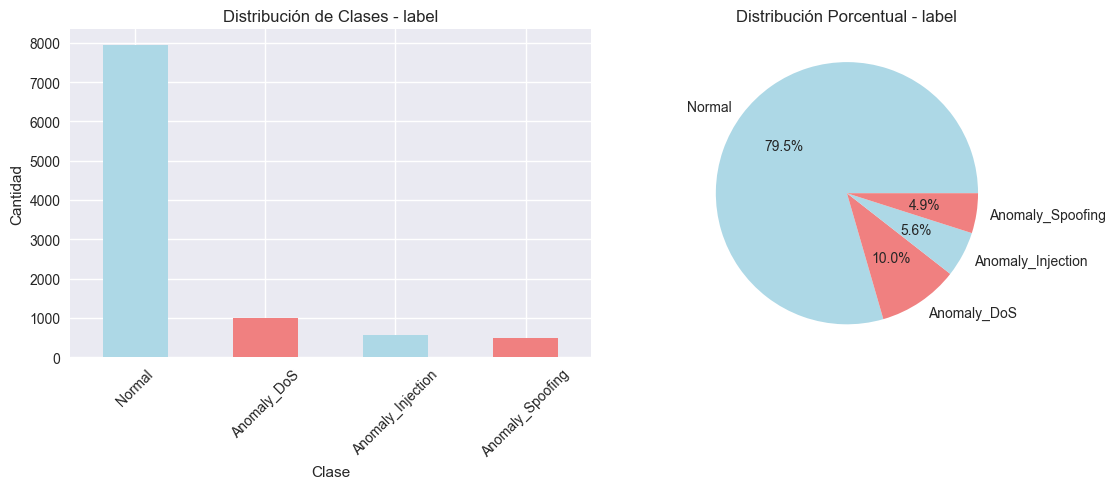


⚖️  ANÁLISIS DEL BALANCE:
   Clase mayoritaria: Normal (7948 registros)
   Clase minoritaria: Anomaly_Spoofing (492 registros)
   Ratio de desbalance: 16.15:1
   ⚠️  Dataset muy desbalanceado - Considera técnicas de balanceo


In [74]:
# Asumiendo que encontramos la columna objetivo
if target_columns:
    target_col = target_columns[0]  # Tomar la primera columna objetivo encontrada
    
    print(f" DISTRIBUCIÓN DE CLASES - {target_col}")
    print("=" * 50)
    
    # Distribución
    class_counts = df[target_col].value_counts()
    class_percentages = df[target_col].value_counts(normalize=True) * 100
    
    print("📈 Conteos:")
    print(class_counts)
    print(f"\n Porcentajes:")
    print(class_percentages)
    
    # Visualización de la distribución
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: Gráfico de barras
    plt.subplot(1, 2, 1)
    class_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])
    plt.title(f'Distribución de Clases - {target_col}')
    plt.xlabel('Clase')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    
    # Subplot 2: Gráfico de pastel
    plt.subplot(1, 2, 2)
    plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
            colors=['lightblue', 'lightcoral'])
    plt.title(f'Distribución Porcentual - {target_col}')
    
    plt.tight_layout()
    plt.show()
    
    # Análisis del balance
    print(f"\n⚖️  ANÁLISIS DEL BALANCE:")
    print(f"   Clase mayoritaria: {class_counts.index[0]} ({class_counts.iloc[0]} registros)")
    print(f"   Clase minoritaria: {class_counts.index[-1]} ({class_counts.iloc[-1]} registros)")
    print(f"   Ratio de desbalance: {class_counts.iloc[0] / class_counts.iloc[-1]:.2f}:1")
    
    if class_counts.iloc[0] / class_counts.iloc[-1] > 10:
        print("   ⚠️  Dataset muy desbalanceado - Considera técnicas de balanceo")
    elif class_counts.iloc[0] / class_counts.iloc[-1] > 5:
        print("   ⚠️  Dataset moderadamente desbalanceado")
    else:
        print("   ✅ Dataset relativamente balanceado")
else:
    print("❌ No se puede analizar la distribución sin columna objetivo")
    print("�� Ejecuta primero la celda anterior para identificar la columna objetivo")

## 🔢 Análisis de Features Numéricas

 COLUMNAS NUMÉRICAS ENCONTRADAS: 10
📋 Lista de columnas numéricas:
  cpu_usage
  memory_usage
  network_in_kb
  network_out_kb
  packet_rate
  avg_response_time_ms
  service_access_count
  failed_auth_attempts
  is_encrypted
  geo_location_variation

📊 ESTADÍSTICAS DESCRIPTIVAS
          cpu_usage  memory_usage  network_in_kb  network_out_kb   packet_rate  avg_response_time_ms  service_access_count  failed_auth_attempts  is_encrypted  geo_location_variation
count  10000.000000  10000.000000   10000.000000    10000.000000  10000.000000          10000.000000          10000.000000          10000.000000  10000.000000            10000.000000
mean      50.135609     47.573347     757.415600      750.749300    500.465100            259.963408              5.048600              5.026400      0.496400                9.976170
std       23.306642     21.599785     426.951795      431.117825    285.576877            138.839308              2.581028              3.167445      0.500012              

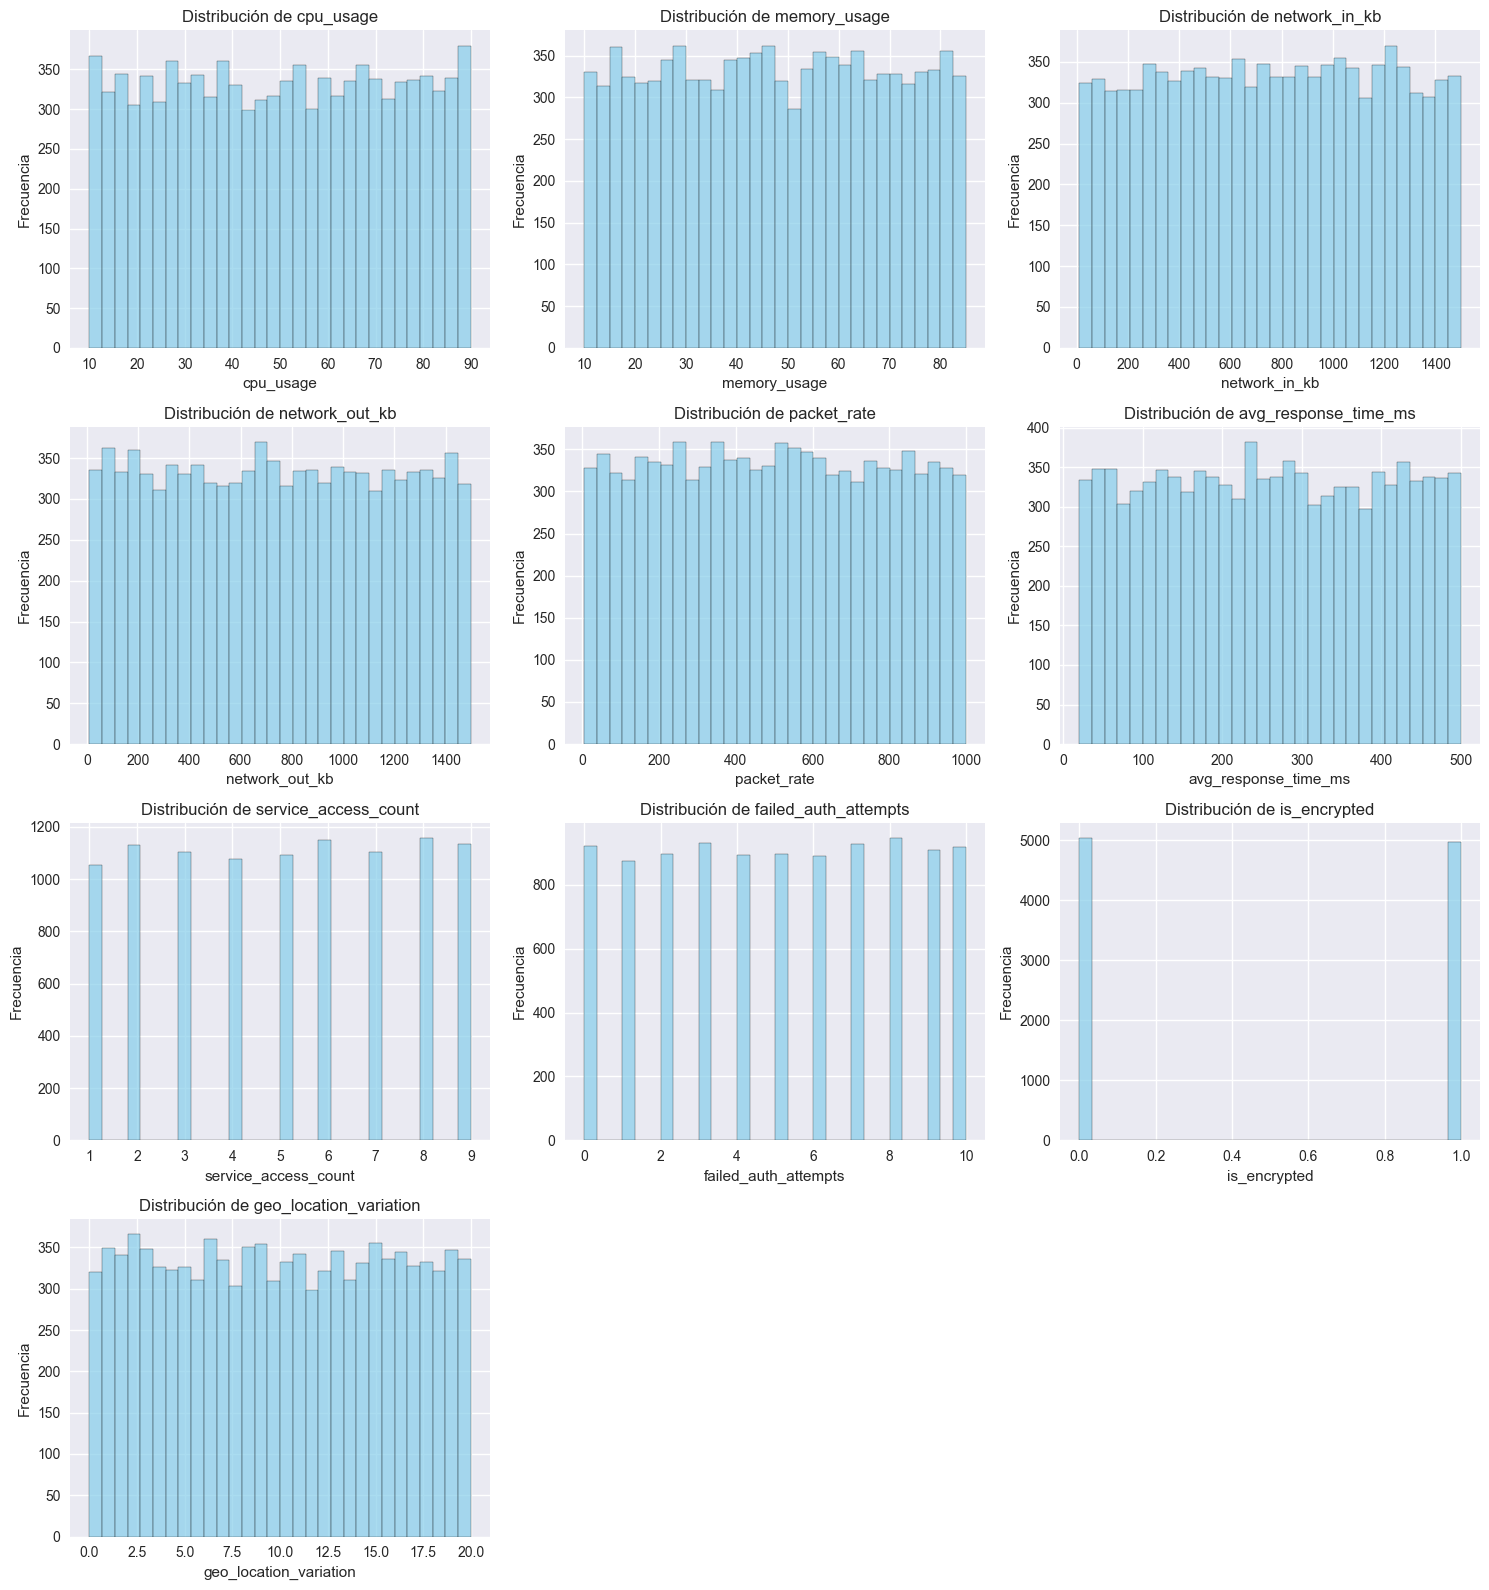

In [75]:
# Identificar columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f" COLUMNAS NUMÉRICAS ENCONTRADAS: {len(numeric_columns)}")
print("=" * 50)

if numeric_columns:
    print("📋 Lista de columnas numéricas:")
    for col in numeric_columns:
        print(f"  {col}")
    
    # Estadísticas descriptivas
    print(f"\n📊 ESTADÍSTICAS DESCRIPTIVAS")
    print("=" * 50)
    print(df[numeric_columns].describe())
    
    # Análisis de outliers con IQR
    print(f"\n🔍 ANÁLISIS DE OUTLIERS (Método IQR)")
    print("=" * 50)
    
    outliers_info = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count = len(outliers)
        outliers_percent = (outliers_count / len(df)) * 100
        
        outliers_info[col] = {
            'outliers_count': outliers_count,
            'outliers_percent': outliers_percent,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        print(f"📊 {col}:")
        print(f"   Outliers: {outliers_count} ({outliers_percent:.2f}%)")
        print(f"   Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print("-" * 30)
    
    # Visualización de distribuciones
    print(f"\n📈 VISUALIZACIÓN DE DISTRIBUCIONES")
    print("=" * 50)
    
    # Calcular número de subplots necesarios
    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 4 * n_rows))
    
    for i, col in enumerate(numeric_columns):
        plt.subplot(n_rows, n_cols, i + 1)
        
        # Histograma
        plt.hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        
        # Agregar líneas de outliers
        if outliers_info[col]['outliers_count'] > 0:
            plt.axvline(outliers_info[col]['lower_bound'], color='red', linestyle='--', 
                       label=f"Lower bound: {outliers_info[col]['lower_bound']:.2f}")
            plt.axvline(outliers_info[col]['upper_bound'], color='red', linestyle='--', 
                       label=f"Upper bound: {outliers_info[col]['upper_bound']:.2f}")
            plt.legend()
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ No se encontraron columnas numéricas")

## 🔤 Análisis de Features Categóricas

 COLUMNAS CATEGÓRICAS ENCONTRADAS: 4
📋 Lista de columnas categóricas:
  timestamp
  device_id
  device_type
  label

 ANÁLISIS DETALLADO DE COLUMNAS CATEGÓRICAS

📝 COLUMNA: timestamp
------------------------------
   Valores únicos: 10000
   Top 10 valores más frecuentes:
     '2025-06-20 12:51:55.452400': 1 (0.01%)
     '2025-06-20 12:51:56.452400': 1 (0.01%)
     '2025-06-20 12:51:57.452400': 1 (0.01%)
     '2025-06-20 12:51:58.452400': 1 (0.01%)
     '2025-06-20 12:51:59.452400': 1 (0.01%)
     '2025-06-20 12:52:00.452400': 1 (0.01%)
     '2025-06-20 12:52:01.452400': 1 (0.01%)
     '2025-06-20 12:52:02.452400': 1 (0.01%)
     '2025-06-20 12:52:03.452400': 1 (0.01%)
     '2025-06-20 12:52:04.452400': 1 (0.01%)
   ⚠️  Muchos valores únicos (10000) - Considera agrupar o codificar

📝 COLUMNA: device_id
------------------------------
   Valores únicos: 200
   Top 10 valores más frecuentes:
     'thermostat_5': 65 (0.65%)
     'camera_17': 65 (0.65%)
     'camera_47': 64 (0.64%)
     'se

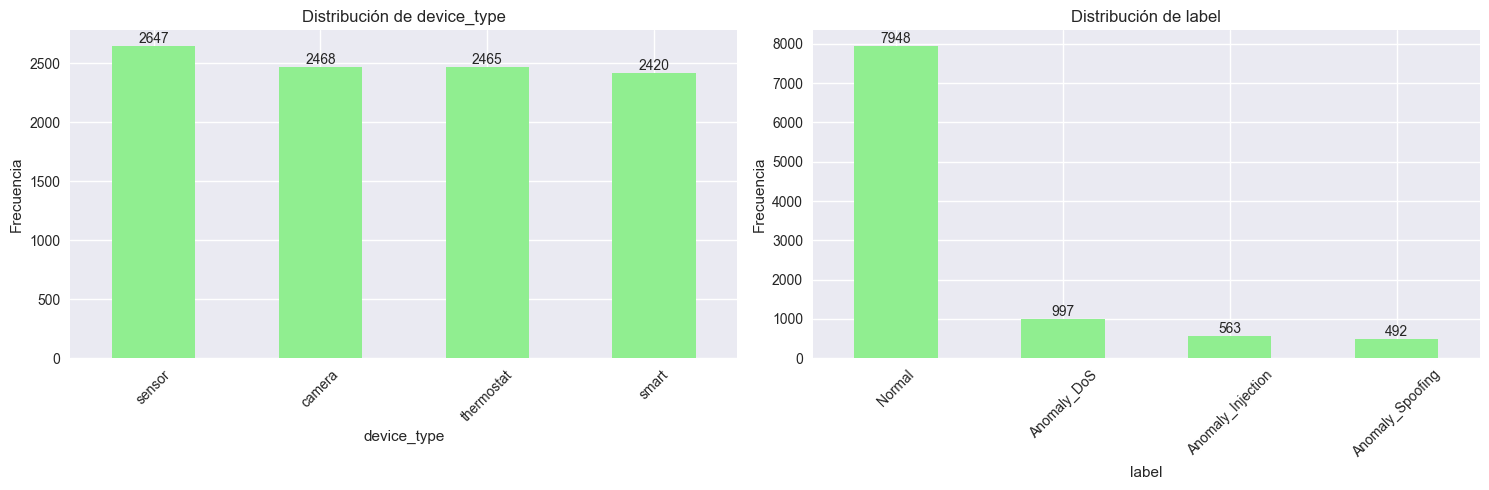

In [76]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f" COLUMNAS CATEGÓRICAS ENCONTRADAS: {len(categorical_columns)}")
print("=" * 50)

if categorical_columns:
    print("📋 Lista de columnas categóricas:")
    for col in categorical_columns:
        print(f"  {col}")
    
    # Análisis de cada columna categórica
    print(f"\n ANÁLISIS DETALLADO DE COLUMNAS CATEGÓRICAS")
    print("=" * 50)
    
    for col in categorical_columns:
        print(f"\n📝 COLUMNA: {col}")
        print("-" * 30)
        
        # Valores únicos
        unique_values = df[col].nunique()
        print(f"   Valores únicos: {unique_values}")
        
        # Top valores más frecuentes
        top_values = df[col].value_counts().head(10)
        print(f"   Top 10 valores más frecuentes:")
        for value, count in top_values.items():
            percentage = (count / len(df)) * 100
            print(f"     '{value}': {count} ({percentage:.2f}%)")
        
        # Valores faltantes
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"   Valores faltantes: {missing_count} ({(missing_count/len(df))*100:.2f}%)")
        
        # Si hay muchos valores únicos, mostrar solo los primeros
        if unique_values > 20:
            print(f"   ⚠️  Muchos valores únicos ({unique_values}) - Considera agrupar o codificar")
    
    # Visualización de las columnas categóricas más importantes
    print(f"\n📈 VISUALIZACIÓN DE COLUMNAS CATEGÓRICAS")
    print("=" * 50)
    
    # Seleccionar columnas con menos de 20 valores únicos para visualizar
    viz_columns = [col for col in categorical_columns if df[col].nunique() <= 20]
    
    if viz_columns:
        n_cols = 2
        n_rows = (len(viz_columns) + n_cols - 1) // n_cols
        
        plt.figure(figsize=(15, 5 * n_rows))
        
        for i, col in enumerate(viz_columns):
            plt.subplot(n_rows, n_cols, i + 1)
            
            # Gráfico de barras
            value_counts = df[col].value_counts()
            value_counts.plot(kind='bar', color='lightgreen')
            plt.title(f'Distribución de {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=45)
            
            # Agregar valores en las barras
            for j, v in enumerate(value_counts.values):
                plt.text(j, v, str(v), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️  No hay columnas categóricas con pocos valores únicos para visualizar")
        
else:
    print("❌ No se encontraron columnas categóricas")

##  Análisis de Correlaciones

 ANÁLISIS DE CORRELACIONES
📊 Matriz de correlación:
                        cpu_usage  memory_usage  network_in_kb  network_out_kb  packet_rate  avg_response_time_ms  service_access_count  failed_auth_attempts  is_encrypted  geo_location_variation
cpu_usage                   1.000        -0.009          0.004          -0.003       -0.001                 0.010                 0.002                 0.002         0.001                  -0.006
memory_usage               -0.009         1.000          0.010          -0.003       -0.014                 0.016                -0.006                -0.004        -0.009                  -0.007
network_in_kb               0.004         0.010          1.000           0.003        0.014                -0.002                -0.011                 0.008         0.007                   0.002
network_out_kb             -0.003        -0.003          0.003           1.000        0.005                -0.008                -0.002                 0.003       

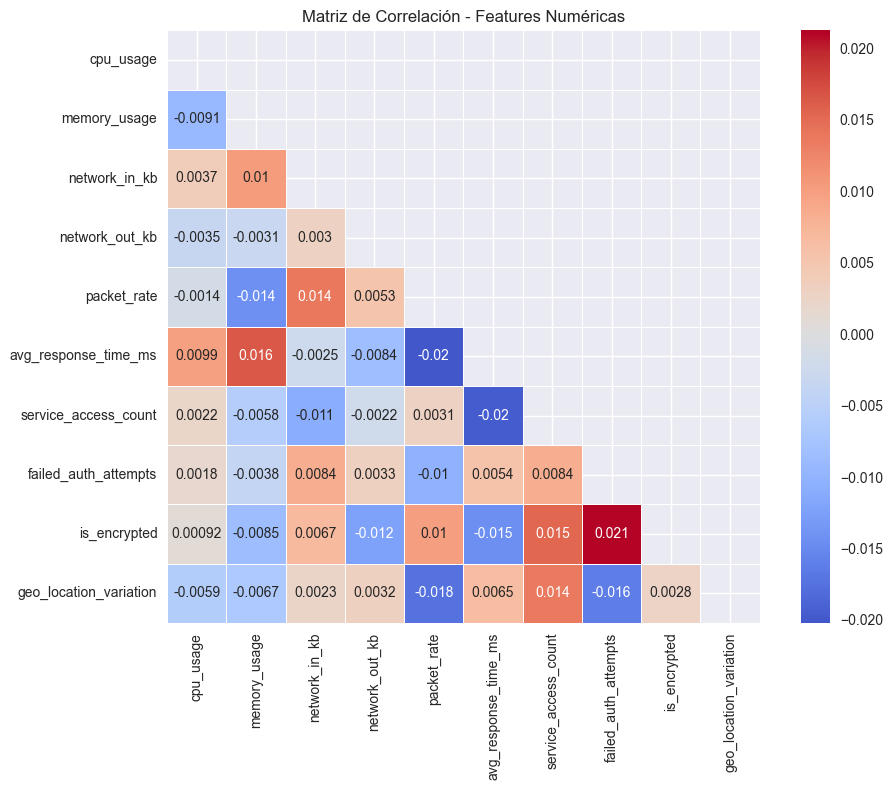


🔍 CORRELACIONES FUERTES (|r| > 0.7):
✅ No hay correlaciones fuertes entre variables


In [77]:
# Análisis de correlaciones entre variables numéricas
if len(numeric_columns) > 1:
    print(" ANÁLISIS DE CORRELACIONES")
    print("=" * 50)
    
    # Matriz de correlación
    correlation_matrix = df[numeric_columns].corr()
    
    print("📊 Matriz de correlación:")
    print(correlation_matrix.round(3))
    
    # Visualización de la matriz de correlación
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
                center=0, square=True, linewidths=0.5)
    plt.title('Matriz de Correlación - Features Numéricas')
    plt.tight_layout()
    plt.show()
    
    # Identificar correlaciones fuertes
    print("\n🔍 CORRELACIONES FUERTES (|r| > 0.7):")
    print("=" * 50)
    
    strong_correlations = []
    for i in range(len(numeric_columns)):
        for j in range(i+1, len(numeric_columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                strong_correlations.append({
                    'feature1': numeric_columns[i],
                    'feature2': numeric_columns[j],
                    'correlation': corr_value
                })
    
    if strong_correlations:
        for corr in strong_correlations:
            print(f" {corr['feature1']} ↔ {corr['feature2']}: {corr['correlation']:.3f}")
        print("\n Considera eliminar una de las variables altamente correlacionadas")
    else:
        print("✅ No hay correlaciones fuertes entre variables")
        
else:
    print("❌ Se necesitan al menos 2 variables numéricas para analizar correlaciones")

## 🎯 Preparación para Machine Learning - Split 80/20

In [78]:
# Preparación para ML con split 80% sin etiquetas / 20% con etiquetas
if target_columns:
    target_col = target_columns[0]
    
    print(" PREPARACIÓN PARA MACHINE LEARNING")
    print("=" * 50)
    print("📋 Estrategia: 80% sin etiquetas (no supervisado) + 20% con etiquetas (semi-supervisado)")
    
    # Split 80/20
    df_labeled, df_unlabeled = train_test_split(df, test_size=0.8, 
                                               random_state=42, 
                                               stratify=df[target_col])
    
    print(f"\n📊 RESULTADO DEL SPLIT:")
    print(f"   Dataset con etiquetas (20%): {len(df_labeled)} registros")
    print(f"   Dataset sin etiquetas (80%): {len(df_unlabeled)} registros")
    print(f"   Total: {len(df)} registros")
    
    # Verificar distribución en el split
    print(f"\n DISTRIBUCIÓN EN EL SPLIT:")
    print("=" * 50)
    
    print("📊 Dataset con etiquetas (20%):")
    labeled_dist = df_labeled[target_col].value_counts()
    for class_name, count in labeled_dist.items():
        percentage = (count / len(df_labeled)) * 100
        print(f"   {class_name}: {count} ({percentage:.2f}%)")
    
    print(f"\n📊 Dataset sin etiquetas (80%):")
    print("   (No tenemos acceso a las etiquetas para este análisis)")
    
    # Guardar los datasets separados
    print(f"\n GUARDANDO DATASETS SEPARADOS:")
    print("=" * 50)
    
    # Crear directorio para datos procesados
    processed_dir = DATA_DIR / "processed"
    processed_dir.mkdir(parents=True, exist_ok=True)
    print(f"   ✅ Directorio processed creado: {processed_dir}")
    
    # Guardar dataset con etiquetas
    labeled_file = processed_dir / "dataset_labeled_20p.csv"
    df_labeled.to_csv(labeled_file, index=False)
    print(f"   ✅ Dataset con etiquetas guardado: {labeled_file}")
    
    # Guardar dataset sin etiquetas (ocultando la columna objetivo)
    unlabeled_file = processed_dir / "dataset_unlabeled_80p.csv"
    df_unlabeled_without_target = df_unlabeled.drop(columns=[target_col])
    df_unlabeled_without_target.to_csv(unlabeled_file, index=False)
    print(f"   ✅ Dataset sin etiquetas guardado: {unlabeled_file}")
    
    # Guardar dataset completo para referencia
    complete_file = processed_dir / "dataset_complete.csv"
    df.to_csv(complete_file, index=False)
    print(f"   ✅ Dataset completo guardado: {complete_file}")
    
    print(f"\n Archivos guardados en: {processed_dir}")
    
else:
    print("❌ No se puede hacer el split sin columna objetivo")
    print("💡 Ejecuta primero las celdas anteriores para identificar la columna objetivo")

 PREPARACIÓN PARA MACHINE LEARNING
📋 Estrategia: 80% sin etiquetas (no supervisado) + 20% con etiquetas (semi-supervisado)

📊 RESULTADO DEL SPLIT:
   Dataset con etiquetas (20%): 2000 registros
   Dataset sin etiquetas (80%): 8000 registros
   Total: 10000 registros

 DISTRIBUCIÓN EN EL SPLIT:
📊 Dataset con etiquetas (20%):
   Normal: 1590 (79.50%)
   Anomaly_DoS: 199 (9.95%)
   Anomaly_Injection: 113 (5.65%)
   Anomaly_Spoofing: 98 (4.90%)

📊 Dataset sin etiquetas (80%):
   (No tenemos acceso a las etiquetas para este análisis)

 GUARDANDO DATASETS SEPARADOS:
   ✅ Directorio processed creado: c:\Users\Esteban\Desktop\MELIChallenge\data\processed
   ✅ Dataset con etiquetas guardado: c:\Users\Esteban\Desktop\MELIChallenge\data\processed\dataset_labeled_20p.csv
   ✅ Dataset sin etiquetas guardado: c:\Users\Esteban\Desktop\MELIChallenge\data\processed\dataset_unlabeled_80p.csv
   ✅ Dataset completo guardado: c:\Users\Esteban\Desktop\MELIChallenge\data\processed\dataset_complete.csv

 Arch

## 🔧 Preparación de Features para ML

In [79]:
# Preparación de features para ML
print("🔧 PREPARACIÓN DE FEATURES PARA MACHINE LEARNING")
print("=" * 50)

# Dataset con etiquetas para preparación
if target_columns:
    target_col = target_columns[0]
    
    print("📊 PREPARANDO FEATURES DEL DATASET CON ETIQUETAS (20%)")
    print("-" * 50)
    
    # Copiar el dataset con etiquetas
    df_ml = df_labeled.copy()
    
    # 1. Manejo de valores faltantes
    print("1️⃣  MANEJO DE VALORES FALTANTES:")
    print("   - Variables numéricas: Rellenar con mediana")
    print("   - Variables categóricas: Rellenar con moda")
    
    for col in numeric_columns:
        if df_ml[col].isnull().sum() > 0:
            median_val = df_ml[col].median()
            df_ml[col].fillna(median_val, inplace=True)
            print(f"   📊 {col}: Rellenado con mediana = {median_val:.3f}")
    
    for col in categorical_columns:
        if df_ml[col].isnull().sum() > 0:
            mode_val = df_ml[col].mode()[0]
            df_ml[col].fillna(mode_val, inplace=True)
            print(f"   📝 {col}: Rellenado con moda = '{mode_val}'")
    
    # 2. Codificación de variables categóricas
    print("\n2️⃣  CODIFICACIÓN DE VARIABLES CATEGÓRICAS:")
    print("   - Aplicando Label Encoding")
    
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        df_ml[f"{col}_encoded"] = le.fit_transform(df_ml[col])
        label_encoders[col] = le
        print(f"   📝 {col}: {len(le.classes_)} categorías codificadas")
    
    # 3. Selección de features para ML
    print("\n3️⃣  SELECCIÓN DE FEATURES:")
    print("   - Variables numéricas originales")
    print("   - Variables categóricas codificadas")
    
    # Crear lista de features para ML
    ml_features = numeric_columns.copy()
    ml_features.extend([f"{col}_encoded" for col in categorical_columns])
    
    print(f"   Total de features: {len(ml_features)}")
    print(f"   Features seleccionados: {ml_features}")
    
    # 4. Preparar X e y
    X = df_ml[ml_features]
    y = df_ml[target_col]
    
    print(f"\n DATASET FINAL PARA ML:")
    print(f"   X shape: {X.shape}")
    print(f"   y shape: {y.shape}")
    print(f"   Features: {list(X.columns)}")
    
    # 5. Estandarización de features
    print("\n4️⃣  ESTANDARIZACIÓN DE FEATURES:")
    print("   - Aplicando StandardScaler a todas las features")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    print(f"   ✅ Features estandarizadas")
    print(f"   📊 Rango de valores: [{X_scaled_df.min().min():.3f}, {X_scaled_df.max().max():.3f}]")
    
    # 6. Guardar dataset preparado
    print("\n5️⃣  GUARDANDO DATASET PREPARADO:")
    print("=" * 50)
    
    # Guardar features y target
    features_file = processed_dir / "X_features_scaled.csv"
    target_file = processed_dir / "y_target.csv"
    
    X_scaled_df.to_csv(features_file, index=False)
    y.to_csv(target_file, index=False)
    
    print(f"   ✅ Features escaladas guardadas: {features_file}")
    print(f"   ✅ Target guardado: {target_file}")
    
    # Guardar información de preprocesamiento
    preprocessing_info = {
        'features_used': ml_features,
        'numeric_columns': numeric_columns,
        'categorical_columns': categorical_columns,
        'label_encoders': {col: list(le.classes_) for col, le in label_encoders.items()},
        'scaler_info': {
            'mean': scaler.mean_.tolist(),
            'scale': scaler.scale_.tolist()
        }
    }
    
    import json
    preprocessing_file = processed_dir / "preprocessing_info.json"
    with open(preprocessing_file, 'w') as f:
        json.dump(preprocessing_info, f, indent=2)
    
    print(f"   ✅ Información de preprocesamiento guardada: {preprocessing_file}")
    
else:
    print("❌ No se puede preparar features sin columna objetivo")
    print("💡 Ejecuta primero las celdas anteriores para identificar la columna objetivo")

🔧 PREPARACIÓN DE FEATURES PARA MACHINE LEARNING
📊 PREPARANDO FEATURES DEL DATASET CON ETIQUETAS (20%)
--------------------------------------------------
1️⃣  MANEJO DE VALORES FALTANTES:
   - Variables numéricas: Rellenar con mediana
   - Variables categóricas: Rellenar con moda

2️⃣  CODIFICACIÓN DE VARIABLES CATEGÓRICAS:
   - Aplicando Label Encoding
   📝 timestamp: 2000 categorías codificadas
   📝 device_id: 200 categorías codificadas
   📝 device_type: 4 categorías codificadas
   📝 label: 4 categorías codificadas

3️⃣  SELECCIÓN DE FEATURES:
   - Variables numéricas originales
   - Variables categóricas codificadas
   Total de features: 14
   Features seleccionados: ['cpu_usage', 'memory_usage', 'network_in_kb', 'network_out_kb', 'packet_rate', 'avg_response_time_ms', 'service_access_count', 'failed_auth_attempts', 'is_encrypted', 'geo_location_variation', 'timestamp_encoded', 'device_id_encoded', 'device_type_encoded', 'label_encoded']

 DATASET FINAL PARA ML:
   X shape: (2000, 14

## 📊 Resumen y Conclusiones del EDA

In [80]:
# Resumen y conclusiones del EDA
print("📊 RESUMEN Y CONCLUSIONES DEL EDA")
print("=" * 50)

print(" OBJETIVO ALCANZADO:")
print("   ✅ Dataset cargado y explorado exitosamente")
print("   ✅ Análisis completo de estructura y calidad de datos")
print("   ✅ Preparación de features para ML completada")
print("   ✅ Split 80/20 implementado (no supervisado + semi-supervisado)")

print("\n📊 CARACTERÍSTICAS DEL DATASET:")
print(f"   📈 Dimensiones originales: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"   🔢 Variables numéricas: {len(numeric_columns)}")
print(f"   🔤 Variables categóricas: {len(categorical_columns)}")
print(f"   Variable objetivo: {target_columns[0] if target_columns else 'No encontrada'}")

if target_columns:
    target_col = target_columns[0]
    class_dist = df[target_col].value_counts()
    print(f"   📊 Distribución de clases: {dict(class_dist)}")

print("\n INSIGHTS CLAVE:")
print("   📊 Calidad de datos:")
if df.isnull().sum().sum() == 0:
    print("     ✅ No hay valores faltantes")
else:
    print(f"     ⚠️  Hay valores faltantes: {df.isnull().sum().sum()}")

if df.duplicated().sum() == 0:
    print("     ✅ No hay duplicados")
else:
    print(f"     ⚠️  Hay duplicados: {df.duplicated().sum()}")

print("\n   📈 Características para ML:")
print(f"     ✅ Features preparadas: {len(ml_features) if 'ml_features' in locals() else 'N/A'}")
print(f"     ✅ Dataset escalado: {'Sí' if 'X_scaled_df' in locals() else 'No'}")

print("\n PRÓXIMOS PASOS RECOMENDADOS:")
print("   1. Implementar modelo no supervisado (Isolation Forest) con 80% sin etiquetas")
print("   2. Usar 20% con etiquetas para validar y calibrar el modelo")
print("   3. Evaluar métricas de rendimiento (precision, recall, F1)")
print("   4. Ajustar hiperparámetros basado en el rendimiento")
print("   5. Implementar pipeline de producción")

print("\n💡 VENTAJAS DEL ENFOQUE 80/20:")
print("   ✅ Simula escenario real donde la mayoría de logs no están etiquetados")
print("   ✅ Permite entrenar modelo no supervisado robusto")
print("   ✅ 20% etiquetado permite validación y calibración")
print("   ✅ Enfoque semi-supervisado más realista para seguridad")

print("\n ¡EDA COMPLETADO EXITOSAMENTE!")
print("=" * 50)

📊 RESUMEN Y CONCLUSIONES DEL EDA
 OBJETIVO ALCANZADO:
   ✅ Dataset cargado y explorado exitosamente
   ✅ Análisis completo de estructura y calidad de datos
   ✅ Preparación de features para ML completada
   ✅ Split 80/20 implementado (no supervisado + semi-supervisado)

📊 CARACTERÍSTICAS DEL DATASET:
   📈 Dimensiones originales: 10000 filas × 14 columnas
   🔢 Variables numéricas: 10
   🔤 Variables categóricas: 4
   Variable objetivo: label
   📊 Distribución de clases: {'Normal': np.int64(7948), 'Anomaly_DoS': np.int64(997), 'Anomaly_Injection': np.int64(563), 'Anomaly_Spoofing': np.int64(492)}

 INSIGHTS CLAVE:
   📊 Calidad de datos:
     ✅ No hay valores faltantes
     ✅ No hay duplicados

   📈 Características para ML:
     ✅ Features preparadas: 14
     ✅ Dataset escalado: Sí

 PRÓXIMOS PASOS RECOMENDADOS:
   1. Implementar modelo no supervisado (Isolation Forest) con 80% sin etiquetas
   2. Usar 20% con etiquetas para validar y calibrar el modelo
   3. Evaluar métricas de rendimient